# Intialize

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz
import os
import time





cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   

}

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

# Compute CMB power spectra

In [8]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'tCl,lCl,pCl',
# if TT only (i.e., temperature only) is needed pass: 'output': 'tCl'
})
classy_sz.compute_class_szfast()

CPU times: user 30.7 ms, sys: 28.5 ms, total: 59.2 ms
Wall time: 59.9 ms


In [9]:
lensed_cls = classy_sz.lensed_cl()
l_fast = lensed_cls['ell']
cl_tt_fast = lensed_cls['tt']
cl_ee_fast = lensed_cls['ee']
cl_te_fast = lensed_cls['te']
cl_pp_fast = lensed_cls['pp']


# Plot CMB power spectra

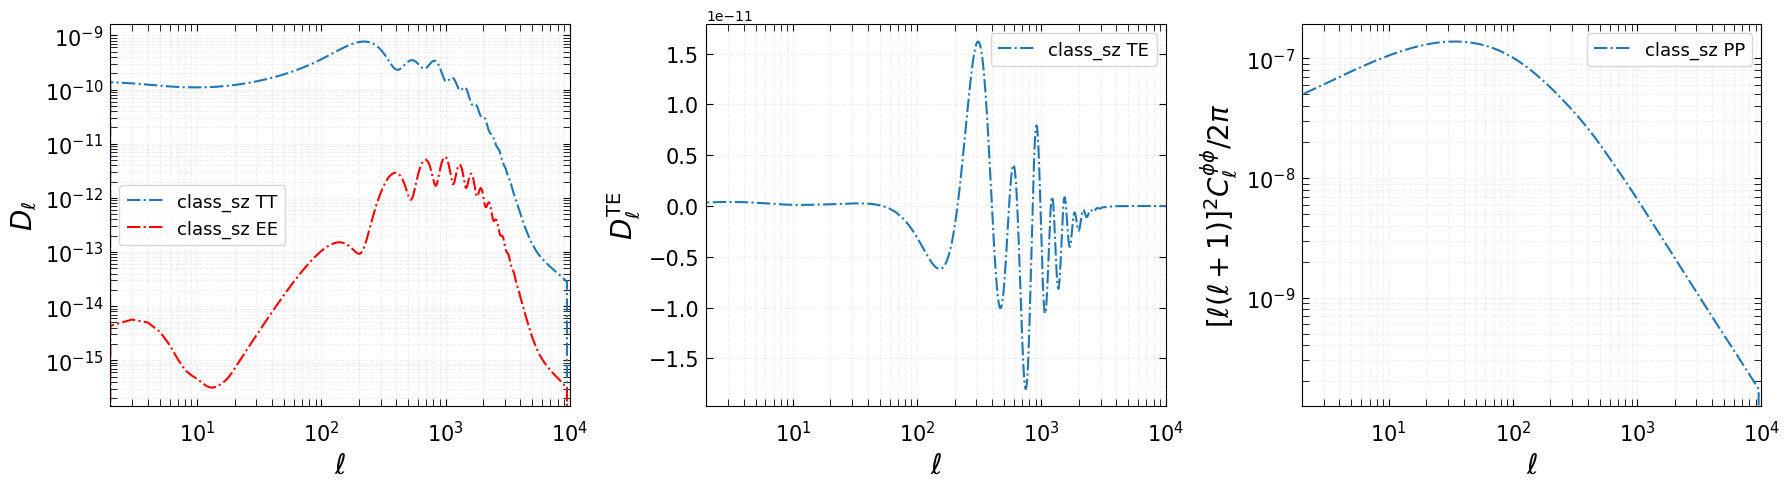

In [12]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_tt_fast,ls='-.',label='class_sz TT') # temperature 


ax.plot(l_fast,l_to_dl(l_fast)*cl_ee_fast,ls='-.',c='red',label='class_sz EE') # polarization 



ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')



ax.plot(l_fast,l_to_dl(l_fast)*cl_te_fast,ls='-.',label='class_sz TE') 


ax.set_ylabel(r"$D_\ell^\mathrm{TE}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


ax.plot(l_fast,l_to_dl(l_fast)*cl_pp_fast*(l_fast*(l_fast+1.)),ls='-.',label='class_sz PP')

ax.set_ylabel(r"$[\ell(\ell+1)]^2 C_\ell^{\phi\phi}/2\pi$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2,1e4)
ax.legend(fontsize=legend_size)
fig.tight_layout()


# Time computation of CMB Cl's

In [5]:
%timeit -n 5 classy_sz.compute_class_szfast()

21 ms ± 575 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
